


#### References

https://towardsdatascience.com/step-by-step-guide-building-a-prediction-model-in-python-ac441e8b9e8b



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Create a model that accurately predicts wind turbine power output from wind speed.


In [13]:
# Data set. Note: We have cleansed the data set to take into account days on which the turbines were inactive.
# This has been determined to be days on which wind speeds were greater than 5mph, however, no power
# was generated. This was deeemed prudent in order to give a more accurate result.

df = pd.read_csv('powerproduction.csv')
col=['speed','power']

# Let's see if the data has loaded correctly. If so, the headings and first 10
# rows will show - yes they do.
print(df.head(n=11))


    speed  power
0   0.000  0.000
1   0.125  0.000
2   0.150  0.000
3   0.225  0.000
4   0.275  0.000
5   0.325  4.331
6   0.400  5.186
7   0.450  3.826
8   0.501  1.048
9   0.526  5.553
10  0.551  6.498


In [18]:
#Let's run a scatter plot to show correlation... 

speed = df["speed"]
power = df["power"]
#plt.scatter(speed, power, edgecolors='r')
#plt.xlabel('speed')
#plt.ylabel('power')
#plt.show()

Text(0, 0.5, 'Power')

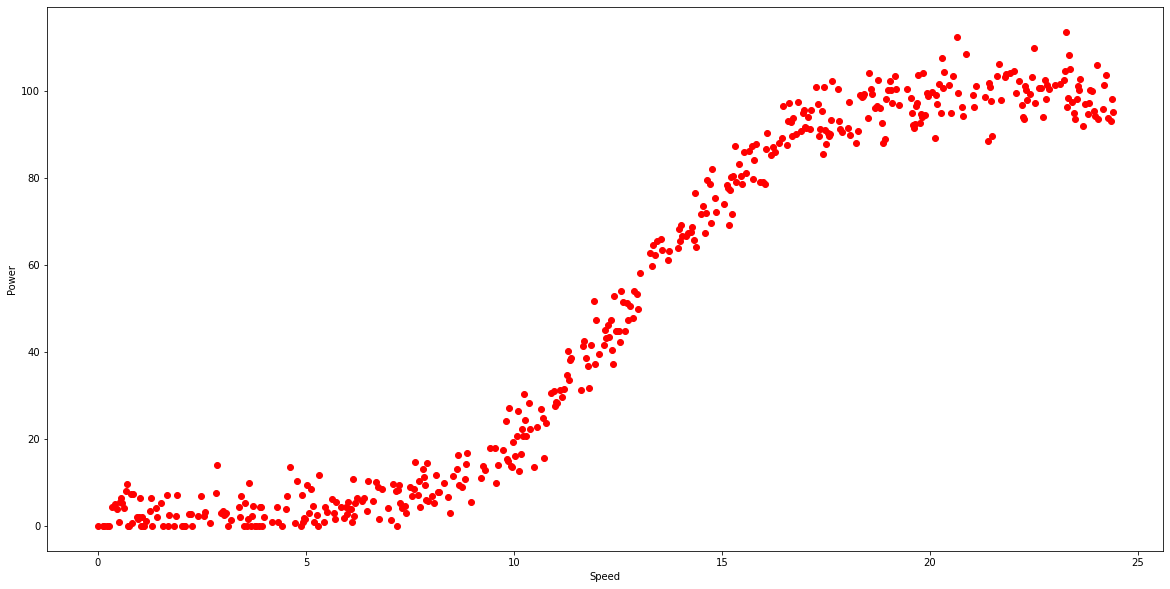

In [19]:
# Plot the points.
x = speed
y = power

plt.plot(x, y, 'ro')
plt.xlabel('Speed')
plt.ylabel('Power')


In [20]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([  5.51397652, -18.08944823])

In [21]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at median and complement.
m, c

(5.513976519830957, -18.08944823119467)

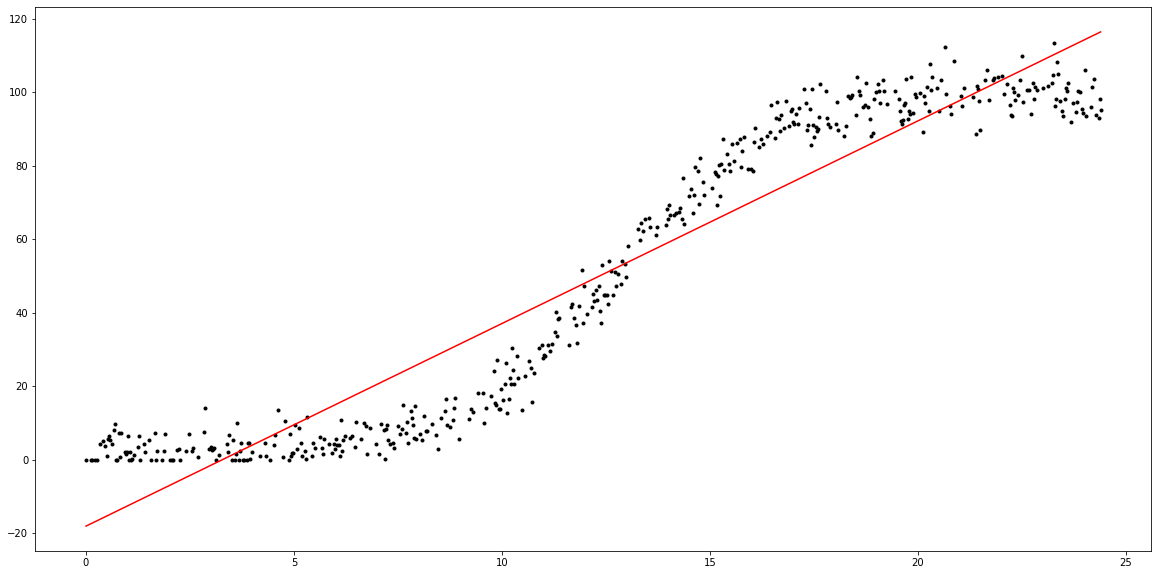

In [22]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

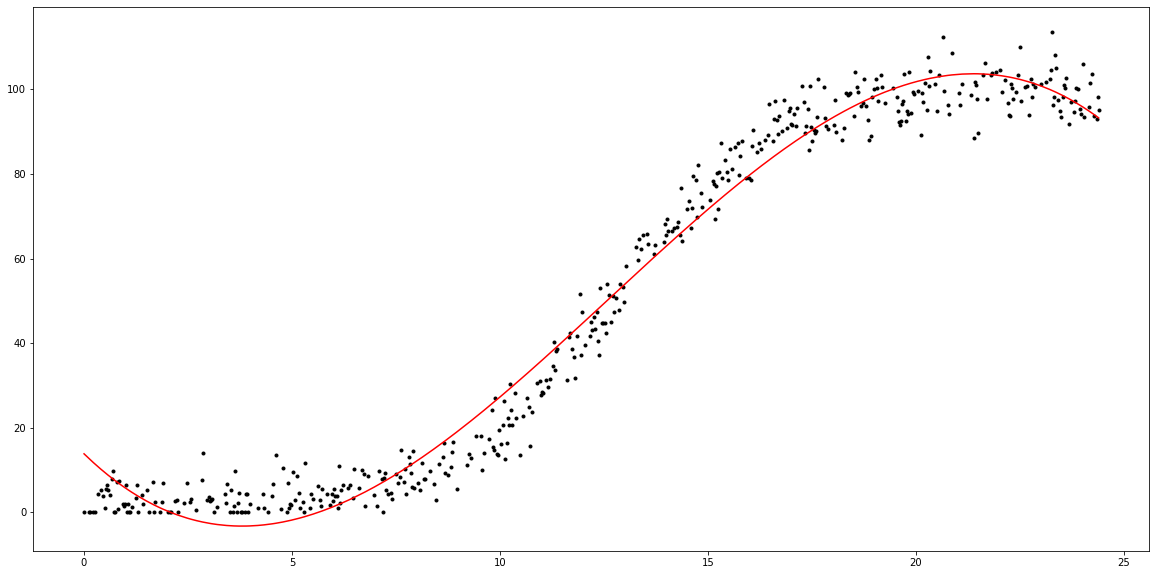

In [36]:
# Next lets look at plotting a z array.
# Create variables with those values.
a, b, c, d = np.polyfit(x, y, 3)
# Have a look at median and complement.
m, c
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')